In [1]:
import numpy as np
import networks_old as nt
import matplotlib.pyplot as plt
plt.rcParams.update({'pdf.fonttype': 42, 'ps.fonttype': 42})
plt.rcParams.update({'font.size': 10, 'font.family': 'Helvetica'})

numba = True
parameters = 'Biological'
recycle_runs = True
different_trials = True

x_axis_label = 'Redundancy'

title_fs = 12 # Title Font Size
c_lowd_lowr = '#bae4b3ff'
c_lowd_highr = '#238b45ff'
c_highd_lowr = '#888888ff'
c_highd_highr = '#000000ff'

In [2]:
seed_signal = 1
seed_network = 1
dt = 1e-4
time_c = 5
d_sim, d_pert, d_seed = nt.create_parameters(parameters, seed_signal=seed_signal, seed_network=seed_network, dt=dt, time_c=time_c) 

# This will take a very long time
no_dim, min_dim, max_dim = 17, 2, 100
no_red, min_red, max_red = 17, 2, 50
starting_seed = 1
no_seeds_high_dim_high_red = 20
no_seeds_high_dim_low_red = 100
no_seeds_low_dim_high_red = 200
no_seeds_low_dim_low_red = 300
save=True

In [3]:
DIM = np.unique(np.round(np.logspace(np.log10(min_dim), np.log10(max_dim), no_dim)).astype(int).tolist())
RED = np.unique(np.round(np.logspace(np.log10(min_red), np.log10(max_red), no_red)).astype(int).tolist())
no_dim = len(DIM)
no_red= len(RED)
print(DIM, RED)

[  2   5  14  38 100] [ 2  4 10 22 50]


In [4]:
total_trials = 0
for dim in DIM:
    for red in RED:
        if red < 10:
            if dim < 10:
                total_trials += no_seeds_low_dim_low_red
            else:
                total_trials += no_seeds_high_dim_low_red
        else:
            if dim < 10:
                total_trials += no_seeds_low_dim_high_red
            else:
                total_trials += no_seeds_high_dim_high_red
print('Total number of trials is: ', total_trials)

Total number of trials is:  77


In [5]:
dict_result = {}
C_CVs = np.zeros((no_dim, no_red))
C_MedianFiringRate = np.zeros((no_dim, no_red))
C_Error = np.zeros((no_dim, no_red))
for i, dim in enumerate(DIM):
    for j, red in enumerate(RED):
        N = dim * red
        if red < 10:
            if dim < 10:
                no_seeds = no_seeds_low_dim_low_red
            else:
                no_seeds = no_seeds_high_dim_low_red
        else:
            if dim < 10:
                no_seeds = no_seeds_low_dim_high_red
            else:
                no_seeds = no_seeds_high_dim_high_red
        Es_d = np.zeros((no_seeds, dim * d_sim['error_points_t']))
        Rs_d = np.zeros((no_seeds, N))
        CVs_d = np.zeros((no_seeds, N))
        for i_seed, seed in enumerate(range(starting_seed, starting_seed + no_seeds)):
            d_seed['trial'] = seed
            print('Matrices', parameters, dim, red, seed)
            if different_trials:
                d_seed['signal'] = seed
                d_seed['network'] = seed
            Rs_d[i_seed, :], CVs_d[i_seed, :], dummy1, dummy2, Es_d[i_seed, :], dummy4, dummy5, dummy6 = nt.run_trial(dim, red, d_sim, d_seed, recycle_runs=recycle_runs, numba=numba)
        Rs_d = Rs_d.reshape(-1)
        Es_d = Es_d.reshape(-1)
        CVs_d = CVs_d.reshape(-1)
        C_CVs[i, j] = np.median(CVs_d[CVs_d > -0.5])
        C_MedianFiringRate[i, j] = np.median(Rs_d)
        C_Error[i, j] = np.median(Es_d)

dict_result['CVs'] = C_CVs
dict_result['MedianFiringRate'] = C_MedianFiringRate
dict_result['Error'] = C_Error

Matrices Biological 2 2 1
Matrices Biological 2 2 2
Matrices Biological 2 2 3
Matrices Biological 2 2 4
Matrices Biological 2 2 5
Matrices Biological 2 4 1
Matrices Biological 2 4 2
Matrices Biological 2 4 3
Matrices Biological 2 4 4
Matrices Biological 2 4 5
Matrices Biological 2 10 1
Matrices Biological 2 10 2
Matrices Biological 2 10 3
Matrices Biological 2 10 4
Matrices Biological 2 10 5
Matrices Biological 2 22 1
Matrices Biological 2 22 2
Matrices Biological 2 22 3
Matrices Biological 2 22 4
Matrices Biological 2 22 5
Matrices Biological 2 50 1
Matrices Biological 2 50 2
Matrices Biological 2 50 3
Matrices Biological 2 50 4
Matrices Biological 2 50 5
Matrices Biological 5 2 1
Matrices Biological 5 2 2
Matrices Biological 5 2 3
Matrices Biological 5 2 4
Matrices Biological 5 2 5
Matrices Biological 5 4 1
Matrices Biological 5 4 2
Matrices Biological 5 4 3
Matrices Biological 5 4 4
Matrices Biological 5 4 5
Matrices Biological 5 10 1
Matrices Biological 5 10 2
Matrices Biological 5

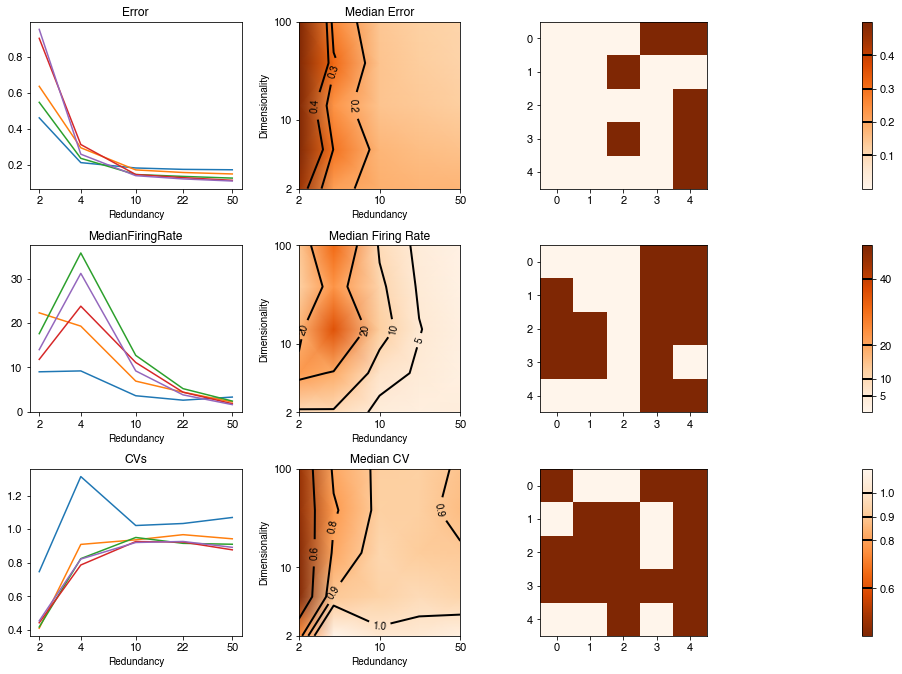

In [6]:
import matplotlib 
matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11) 
alpha_b = 1
no_cols = 4
metric_v = ['Error', 'MedianFiringRate', 'CVs']
CMAP = ['Oranges', 'Oranges', 'Oranges_r']

LEVELS = [[0.1, 0.2, 0.3, 0.4], [5, 10, 20, 40], [0.6, 0.8, 0.9, 1]]
VV = [[0, 0.5], [0, 50], [0.4, 1.1]]

scaling_factor = 0.49

AUX = RED
max_aux = max_red
min_aux = min_red
base = 2
DIM_x = np.log(DIM) / np.log(base)
AUX_x = np.log(AUX) / np.log(base)


fig, ax = plt.subplots(len(metric_v), no_cols, figsize=(scaling_factor * 7 * no_cols, scaling_factor * len(metric_v) * 7))
for i_metric, metric in enumerate(metric_v):
    matrix = dict_result[metric]

    cmap = CMAP[i_metric]
    vmin, vmax = VV[i_metric][0], VV[i_metric][1]
    levels=LEVELS[i_metric]
    
    # RAW data, line plots
    ax_plots = ax[i_metric, 0]
    for i_dim, dim in enumerate(DIM):
        ax_plots.plot(AUX_x, matrix[i_dim, :], label='dim:{}'.format(dim))
    ax_plots.set_xlabel(x_axis_label)
    ax_plots.set_xticks(AUX_x)
    ax_plots.set_xticklabels(AUX)
    ax_plots.set_title(metric)
    

    # Final, nuimshow clipped, contours
    ax_final = ax[i_metric, 1]
    ax_final.pcolormesh(AUX_x, DIM_x, matrix, shading='gouraud', vmin=vmin, vmax = vmax, alpha = alpha_b, cmap=cmap)
    CS = ax_final.contour(AUX_x, DIM_x, matrix, levels=levels, linestyles=('-',), linewidths=(2,), colors='k')
    ax_final.set_xticks(np.log(np.array([min_aux, 10, max_aux])) / np.log(base))
    ax_final.set_yticks(np.log(np.array([min_dim, 10, max_dim])) / np.log(base))
    ax_final.set_xticklabels([min_aux, 10, max_aux])
    ax_final.set_yticklabels([min_dim, 10, max_dim])
    ax_final.set_xlabel(x_axis_label)
    ax_final.set_ylabel('Dimensionality')
    if metric == 'MedianFiringRate':
        ax_final.set_title('Median Firing Rate', fontsize=title_fs)
    if metric == 'Error':
        ax_final.set_title('Median Error', fontsize=title_fs)
    if metric == 'CVs':
        ax_final.set_title('Median CV', fontsize=title_fs)
    ax_final.set_aspect(0.85)
    
    if metric != 'MedianFiringRate':
        ax_final.clabel(CS, fmt='%1.1f')
    else:
        ax_final.clabel(CS, fmt='%1.0f')
    
    ax_final.set_xlim(np.log(np.array([min_red, max_red]))/np.log(base))
    ax_final.set_ylim(np.log(np.array([min_dim, max_dim]))/np.log(base))


    ax_cb = ax[i_metric, -2]
    CSfake = ax_cb.imshow(vmin + (vmax - vmin) * (np.random.rand(matrix.shape[0], matrix.shape[1])<0.5), interpolation='nearest', cmap=cmap, alpha = alpha_b)
    ax_cbs = ax[i_metric, -1]
    cbar = fig.colorbar(CSfake, cax=ax_cbs, ticks=levels)
    cbar.add_lines(CS)
    ax_cbs.set_aspect(16)
    
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
if save:
    out_file = 'FIG5.pdf'
    fig.savefig(out_file, transparent=True)